<a href="https://colab.research.google.com/github/jeanlucjackson/w266_final_project/blob/main/code/sandboxes/RR/rr_evaluation_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("precision", 5)
sns.set_theme()

In [3]:
evaluation_root = "/content/drive/MyDrive/w266 NLP Final Project/Evaluation/"
filename = evaluation_root + "evaluation_database.json"

evaluation_df = pd.read_json(filename)

In [4]:
evaluation_df.columns

Index(['prediction_set', 'target', 'prediction', 'rouge1', 'rouge2', 'rougeL',
       'rougeLsum', 'bleu', 'bleurt', 'bertscore-precision',
       'bertscore-recall', 'bertscore-f1', 'meteor', 'base_model',
       'trained_on', 'tested_on', 'nickname'],
      dtype='object')

In [5]:
baseline = (
    evaluation_df[
        (evaluation_df["base_model"] == "T5")
        & (evaluation_df["trained_on"] == "squad")
        & (evaluation_df["tested_on"] == "squad")
    ]
    .groupby(["base_model", "trained_on", "tested_on"])
    .mean()
)
baseline

,,,rouge1,rouge2,rougeL,rougeLsum,bleu,bleurt,bertscore-precision,bertscore-recall,bertscore-f1,meteor
base_model,trained_on,tested_on,,,,,,,,,,
T5,squad,squad,0.48415,0.2684,0.45207,0.45207,0.13233,-0.31867,0.87137,0.85977,0.86493,0.4555


In [6]:
nq_df = (
    evaluation_df[evaluation_df["tested_on"] == "nq"]
    .groupby(["base_model", "trained_on", "tested_on"])
    .mean()
    .sort_values(by=["bertscore-f1"], ascending=False)
)

nq_df

rouge1   rouge2   rougeL  rougeLsum  \
base_model trained_on tested_on                                         
bart       nq         nq         0.57645  0.35704  0.55043    0.55043   
           amalgam    nq         0.56939  0.35312  0.54500    0.54500   
T5         nq         nq         0.54396  0.32134  0.51909    0.51909   
           amalgam    nq         0.54591  0.32184  0.52017    0.52017   
bart       squad      nq         0.42876  0.21263  0.41060    0.41060   
T5         squad      nq         0.42519  0.20808  0.40648    0.40648   
bart       triviaqa   nq         0.40253  0.19710  0.36562    0.36562   
T5         triviaqa   nq         0.31569  0.13138  0.27229    0.27229   
bart       quac       nq         0.33415  0.13695  0.32612    0.32612   
T5         quac       nq         0.14911  0.02392  0.14482    0.14482   

                                    bleu   bleurt  bertscore-precision  \
base_model trained_on tested_on                                          
bart       nq         nq         0.20307 -0.25072              0.87065   
           amalgam    nq         0.19669 -0.26720              0.86654   
T5         nq         nq         0.16104 -0.36865              0.86162   
           amalgam    nq         0.16134 -0.35621              0.86009   
bart       squad      nq         0.01179 -0.63291              0.79289   
T5         squad      nq         0.01195 -0.66086              0.79103   
bart       triviaqa   nq         0.01142 -0.73634              0.77682   
T5         triviaqa   nq         0.00580 -0.94372              0.75308   
bart       quac       nq         0.00504 -0.99088              0.75994   
T5         quac       nq         0.00015 -1.50722              0.69525   

                                 bertscore-recall  bertscore-f1   meteor  
base_model trained_on tested_on                                           
bart       nq         nq                  0.86461       0.86740  0.52880  
           amalgam    nq                  0.86261       0.86433  0.52354  
T5         nq         nq                  0.85231       0.85663  0.49161  
           amalgam    nq                  0.85332       0.85637  0.49404  
bart       squad      nq                  0.80512       0.79860  0.35530  
T5         squad      nq                  0.80262       0.79641  0.35192  
bart       triviaqa   nq                  0.81610       0.79559  0.36744  
T5         triviaqa   nq                  0.78915       0.77015  0.29164  
bart       quac       nq                  0.74197       0.75054  0.22437  
T5         quac       nq                  0.68132       0.68803  0.07611

In [7]:
quac_df = (
    evaluation_df[evaluation_df["tested_on"] == "quac"]
    .groupby(["base_model", "trained_on", "tested_on"])
    .mean()
    .sort_values(by=["bertscore-f1"], ascending=False)
)

quac_df

rouge1   rouge2   rougeL  rougeLsum  \
base_model trained_on tested_on                                         
bart       quac       quac       0.28669  0.14038  0.28275    0.28275   
T5         amalgam    quac       0.25729  0.10261  0.25220    0.25220   
bart       amalgam    quac       0.23807  0.08834  0.23367    0.23367   
T5         quac       quac       0.17203  0.04107  0.17103    0.17103   
           squad      quac       0.18979  0.04513  0.18373    0.18373   
bart       squad      quac       0.18929  0.04660  0.18418    0.18418   
           triviaqa   quac       0.12188  0.02562  0.11367    0.11367   
T5         triviaqa   quac       0.10988  0.01931  0.09891    0.09891   
bart       nq         quac       0.15299  0.03463  0.14961    0.14961   
T5         nq         quac       0.15392  0.03391  0.15030    0.15030   

                                    bleu   bleurt  bertscore-precision  \
base_model trained_on tested_on                                          
bart       quac       quac       0.05722 -0.80825              0.79635   
T5         amalgam    quac       0.02904 -0.93554              0.78894   
bart       amalgam    quac       0.02741 -1.04438              0.75853   
T5         quac       quac       0.00260 -1.37046              0.77134   
           squad      quac       0.00619 -1.15841              0.73554   
bart       squad      quac       0.00712 -1.21476              0.73676   
           triviaqa   quac       0.00146 -1.37454              0.68144   
T5         triviaqa   quac       0.00097 -1.38607              0.68168   
bart       nq         quac       0.00108 -1.34135              0.69252   
T5         nq         quac       0.00100 -1.36087              0.69266   

                                 bertscore-recall  bertscore-f1   meteor  
base_model trained_on tested_on                                           
bart       quac       quac                0.79024       0.79280  0.28805  
T5         amalgam    quac                0.78226       0.78506  0.25508  
bart       amalgam    quac                0.78422       0.77052  0.25015  
T5         quac       quac                0.74996       0.76010  0.16533  
           squad      quac                0.77509       0.75426  0.20958  
bart       squad      quac                0.77328       0.75398  0.20587  
           triviaqa   quac                0.74171       0.70975  0.16401  
T5         triviaqa   quac                0.73624       0.70734  0.14970  
bart       nq         quac                0.70245       0.69718  0.11261  
T5         nq         quac                0.70076       0.69640  0.11132

In [8]:
squad_df = (
    evaluation_df[evaluation_df["tested_on"] == "squad"]
    .groupby(["base_model", "trained_on", "tested_on"])
    .mean()
    .sort_values(by=["bertscore-f1"], ascending=False)
)

squad_df

rouge1   rouge2   rougeL  rougeLsum  \
base_model trained_on tested_on                                         
bart       squad      squad      0.50342  0.29029  0.46919    0.46919   
T5         squad      squad      0.48415  0.26840  0.45207    0.45207   
bart       amalgam    squad      0.49332  0.27932  0.45858    0.45858   
T5         amalgam    squad      0.48770  0.26877  0.45517    0.45517   
bart       triviaqa   squad      0.35068  0.14185  0.31041    0.31041   
           quac       squad      0.30616  0.11332  0.29090    0.29090   
T5         triviaqa   squad      0.29382  0.10589  0.24260    0.24260   
           nq         squad      0.35762  0.14410  0.33007    0.33007   
bart       nq         squad      0.34904  0.13904  0.32262    0.32262   
T5         quac       squad      0.17997  0.02528  0.17344    0.17344   

                                    bleu   bleurt  bertscore-precision  \
base_model trained_on tested_on                                          
bart       squad      squad      0.15124 -0.26694              0.87522   
T5         squad      squad      0.13233 -0.31867              0.87137   
bart       amalgam    squad      0.13581 -0.30807              0.86901   
T5         amalgam    squad      0.12522 -0.32648              0.86913   
bart       triviaqa   squad      0.04703 -0.64540              0.80976   
           quac       squad      0.02772 -0.83182              0.83319   
T5         triviaqa   squad      0.02849 -0.87923              0.78390   
           nq         squad      0.01408 -0.76260              0.80077   
bart       nq         squad      0.01439 -0.76472              0.79753   
T5         quac       squad      0.00094 -1.35503              0.76925   

                                 bertscore-recall  bertscore-f1   meteor  
base_model trained_on tested_on                                           
bart       squad      squad               0.86510       0.86954  0.47534  
T5         squad      squad               0.85977       0.86493  0.45550  
bart       amalgam    squad               0.85790       0.86285  0.46014  
T5         amalgam    squad               0.85625       0.86205  0.45304  
bart       triviaqa   squad               0.82523       0.81675  0.33821  
           quac       squad               0.77589       0.80295  0.24561  
T5         triviaqa   squad               0.79992       0.79096  0.28936  
           nq         squad               0.77286       0.78627  0.25932  
bart       nq         squad               0.77114       0.78382  0.25203  
T5         quac       squad               0.71683       0.74166  0.13432

In [9]:
triviaqa_df = (
    evaluation_df[evaluation_df["tested_on"] == "triviaqa"]
    .groupby(["base_model", "trained_on", "tested_on"])
    .mean()
    .sort_values(by=["bertscore-f1"], ascending=False)
)

triviaqa_df

rouge1   rouge2   rougeL  rougeLsum  \
base_model trained_on tested_on                                         
bart       amalgam    triviaqa   0.43574  0.22139  0.36872    0.36872   
           triviaqa   triviaqa   0.43401  0.21870  0.36778    0.36778   
T5         amalgam    triviaqa   0.41259  0.19464  0.34681    0.34681   
           triviaqa   triviaqa   0.37800  0.16130  0.31530    0.31530   
           squad      triviaqa   0.30981  0.10932  0.26675    0.26675   
bart       squad      triviaqa   0.29777  0.11014  0.26027    0.26027   
           nq         triviaqa   0.33189  0.12853  0.28644    0.28644   
T5         nq         triviaqa   0.31397  0.11666  0.27312    0.27312   
bart       quac       triviaqa   0.21880  0.06256  0.19781    0.19781   
T5         quac       triviaqa   0.12478  0.01284  0.11620    0.11620   

                                    bleu   bleurt  bertscore-precision  \
base_model trained_on tested_on                                          
bart       amalgam    triviaqa   0.07797 -0.62649              0.84381   
           triviaqa   triviaqa   0.07601 -0.63144              0.84438   
T5         amalgam    triviaqa   0.05869 -0.68398              0.83709   
           triviaqa   triviaqa   0.04561 -0.77181              0.82570   
           squad      triviaqa   0.02251 -0.91539              0.81406   
bart       squad      triviaqa   0.02193 -0.90873              0.81524   
           nq         triviaqa   0.00800 -1.01739              0.79994   
T5         nq         triviaqa   0.00732 -1.06236              0.79173   
bart       quac       triviaqa   0.00687 -1.16915              0.79997   
T5         quac       triviaqa   0.00024 -1.52205              0.74182   

                                 bertscore-recall  bertscore-f1   meteor  
base_model trained_on tested_on                                           
bart       amalgam    triviaqa            0.81133       0.82643  0.35459  
           triviaqa   triviaqa            0.80980       0.82592  0.35103  
T5         amalgam    triviaqa            0.80356       0.81911  0.32700  
           triviaqa   triviaqa            0.79665       0.81009  0.29953  
           squad      triviaqa            0.76524       0.78815  0.22553  
bart       squad      triviaqa            0.76418       0.78809  0.21907  
           nq         triviaqa            0.74463       0.77083  0.20083  
T5         nq         triviaqa            0.73877       0.76386  0.18601  
bart       quac       triviaqa            0.71673       0.75547  0.15091  
T5         quac       triviaqa            0.67261       0.70503  0.08886

In [10]:
metrics = list(squad_df.columns)
datasets = evaluation_df["tested_on"].unique()
print(f"metrics = {metrics} \ndatasets = {datasets}")

metrics = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bleu', 'bleurt', 'bertscore-precision', 'bertscore-recall', 'bertscore-f1', 'meteor'] 
datasets = ['nq' 'squad' 'quac' 'triviaqa']


In [11]:
# We gather the predictions for a validation dataset
# Sort the rows from best to worst scores on one metric
# Then we build ranking vectors for all metrics

rankings = {}

for dataset in datasets:
    df = (
        evaluation_df[evaluation_df["tested_on"] == dataset]
        .groupby(["base_model", "trained_on", "tested_on"])
        .mean()
        .sort_values(by=["bleu"], ascending=False)
    )
    for metric in metrics:
        vector = [sorted(df[metric], reverse=True).index(x) + 1 for x in df[metric]]
        rankings[(dataset, metric)] = vector

In [12]:
rankings

{('nq', 'rouge1'): [1, 2, 3, 4, 6, 5, 7, 9, 8, 10],
 ('nq', 'rouge2'): [1, 2, 3, 4, 6, 5, 7, 9, 8, 10],
 ('nq', 'rougeL'): [1, 2, 3, 4, 6, 5, 7, 9, 8, 10],
 ('nq', 'rougeLsum'): [1, 2, 3, 4, 6, 5, 7, 9, 8, 10],
 ('nq', 'bleu'): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 ('nq', 'bleurt'): [1, 2, 3, 4, 6, 5, 7, 8, 9, 10],
 ('nq', 'bertscore-precision'): [1, 2, 4, 3, 6, 5, 7, 9, 8, 10],
 ('nq', 'bertscore-recall'): [1, 2, 3, 4, 7, 6, 5, 8, 9, 10],
 ('nq', 'bertscore-f1'): [1, 2, 4, 3, 6, 5, 7, 8, 9, 10],
 ('nq', 'meteor'): [1, 2, 3, 4, 7, 6, 5, 8, 9, 10],
 ('squad', 'rouge1'): [1, 2, 4, 3, 6, 9, 8, 7, 5, 10],
 ('squad', 'rouge2'): [1, 2, 4, 3, 6, 9, 8, 7, 5, 10],
 ('squad', 'rougeL'): [1, 2, 4, 3, 7, 9, 8, 6, 5, 10],
 ('squad', 'rougeLsum'): [1, 2, 4, 3, 7, 9, 8, 6, 5, 10],
 ('squad', 'bleu'): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 ('squad', 'bleurt'): [1, 2, 3, 4, 5, 9, 8, 7, 6, 10],
 ('squad', 'bertscore-precision'): [1, 4, 2, 3, 6, 9, 5, 8, 7, 10],
 ('squad', 'bertscore-recall'): [1, 3, 2, 4, 5, 6, 

In [13]:
vectors = {}
for dataset in datasets:
    vectors[dataset] = [rankings[(dataset, metric)] for metric in metrics]

In [14]:
similarity = {}
for dataset in datasets:
    similarity[dataset] = pd.DataFrame(
        cosine_similarity(vectors[dataset]), columns=metrics, index=metrics
    )

In [15]:
similarity["nq"]

,rouge1,rouge2,rougeL,rougeLsum,bleu,bleurt,bertscore-precision,bertscore-recall,bertscore-f1,meteor
rouge1,1.00000,1.00000,1.00000,1.00000,0.99481,0.99740,0.99740,0.98961,0.99481,0.98961
rouge2,1.00000,1.00000,1.00000,1.00000,0.99481,0.99740,0.99740,0.98961,0.99481,0.98961
rougeL,1.00000,1.00000,1.00000,1.00000,0.99481,0.99740,0.99740,0.98961,0.99481,0.98961
rougeLsum,1.00000,1.00000,1.00000,1.00000,0.99481,0.99740,0.99740,0.98961,0.99481,0.98961
bleu,0.99481,0.99481,0.99481,0.99481,1.00000,0.99740,0.99221,0.98961,0.99481,0.98961
bleurt,0.99740,0.99740,0.99740,0.99740,0.99740,1.00000,0.99481,0.99221,0.99740,0.99221
bertscore-precision,0.99740,0.99740,0.99740,0.99740,0.99221,0.99481,1.00000,0.98701,0.99740,0.98701
bertscore-recall,0.98961,0.98961,0.98961,0.98961,0.98961,0.99221,0.98701,1.00000,0.98961,1.00000
bertscore-f1,0.99481,0.99481,0.99481,0.99481,0.99481,0.99740,0.99740,0.98961,1.00000,0.98961
meteor,0.98961,0.98961,0.98961,0.98961,0.98961,0.99221,0.98701,1.00000,0.98961,1.00000


In [16]:
similarity["quac"]

,rouge1,rouge2,rougeL,rougeLsum,bleu,bleurt,bertscore-precision,bertscore-recall,bertscore-f1,meteor
rouge1,1.00000,0.99481,0.99740,0.99740,0.98701,0.98961,0.97922,0.97403,0.96883,0.97662
rouge2,0.99481,1.00000,0.99740,0.99740,0.99221,0.98961,0.97922,0.97403,0.96883,0.97662
rougeL,0.99740,0.99740,1.00000,1.00000,0.98961,0.98701,0.98182,0.97143,0.96623,0.97403
rougeLsum,0.99740,0.99740,1.00000,1.00000,0.98961,0.98701,0.98182,0.97143,0.96623,0.97403
bleu,0.98701,0.99221,0.98961,0.98961,1.00000,0.97662,0.96623,0.98701,0.98182,0.98961
bleurt,0.98961,0.98961,0.98701,0.98701,0.97662,1.00000,0.95325,0.95844,0.94286,0.96104
bertscore-precision,0.97922,0.97922,0.98182,0.98182,0.96623,0.95325,1.00000,0.95065,0.96883,0.95584
bertscore-recall,0.97403,0.97403,0.97143,0.97143,0.98701,0.95844,0.95065,1.00000,0.98961,0.99740
bertscore-f1,0.96883,0.96883,0.96623,0.96623,0.98182,0.94286,0.96883,0.98961,1.00000,0.99221
meteor,0.97662,0.97662,0.97403,0.97403,0.98961,0.96104,0.95584,0.99740,0.99221,1.00000


In [17]:
similarity["squad"]

,rouge1,rouge2,rougeL,rougeLsum,bleu,bleurt,bertscore-precision,bertscore-recall,bertscore-f1,meteor
rouge1,1.00000,1.00000,0.99740,0.99740,0.96104,0.99481,0.97143,0.96104,0.96364,0.97662
rouge2,1.00000,1.00000,0.99740,0.99740,0.96104,0.99481,0.97143,0.96104,0.96364,0.97662
rougeL,0.99740,0.99740,1.00000,1.00000,0.95325,0.98961,0.96623,0.95065,0.95325,0.96883
rougeLsum,0.99740,0.99740,1.00000,1.00000,0.95325,0.98961,0.96623,0.95065,0.95325,0.96883
bleu,0.96104,0.96104,0.95325,0.95325,1.00000,0.97403,0.96883,0.99481,0.99221,0.98961
bleurt,0.99481,0.99481,0.98961,0.98961,0.97403,1.00000,0.97662,0.97403,0.97662,0.98442
bertscore-precision,0.97143,0.97143,0.96623,0.96623,0.96883,0.97662,1.00000,0.97662,0.98701,0.95844
bertscore-recall,0.96104,0.96104,0.95065,0.95065,0.99481,0.97403,0.97662,1.00000,0.99740,0.98961
bertscore-f1,0.96364,0.96364,0.95325,0.95325,0.99221,0.97662,0.98701,0.99740,1.00000,0.98182
meteor,0.97662,0.97662,0.96883,0.96883,0.98961,0.98442,0.95844,0.98961,0.98182,1.00000


In [18]:
similarity["triviaqa"]

,rouge1,rouge2,rougeL,rougeLsum,bleu,bleurt,bertscore-precision,bertscore-recall,bertscore-f1,meteor
rouge1,1.00000,0.99740,1.00000,1.00000,0.97922,0.97662,0.95584,0.97922,0.97922,0.97922
rouge2,0.99740,1.00000,0.99740,0.99740,0.97662,0.97922,0.95844,0.97662,0.97662,0.97662
rougeL,1.00000,0.99740,1.00000,1.00000,0.97922,0.97662,0.95584,0.97922,0.97922,0.97922
rougeLsum,1.00000,0.99740,1.00000,1.00000,0.97922,0.97662,0.95584,0.97922,0.97922,0.97922
bleu,0.97922,0.97662,0.97922,0.97922,1.00000,0.99740,0.98701,1.00000,1.00000,1.00000
bleurt,0.97662,0.97922,0.97662,0.97662,0.99740,1.00000,0.98961,0.99740,0.99740,0.99740
bertscore-precision,0.95584,0.95844,0.95584,0.95584,0.98701,0.98961,1.00000,0.98701,0.98701,0.98701
bertscore-recall,0.97922,0.97662,0.97922,0.97922,1.00000,0.99740,0.98701,1.00000,1.00000,1.00000
bertscore-f1,0.97922,0.97662,0.97922,0.97922,1.00000,0.99740,0.98701,1.00000,1.00000,1.00000
meteor,0.97922,0.97662,0.97922,0.97922,1.00000,0.99740,0.98701,1.00000,1.00000,1.00000


In [19]:
# It does not matter which set we use to build the mask
mask = np.triu(np.ones_like(similarity["squad"].corr(), dtype=bool))

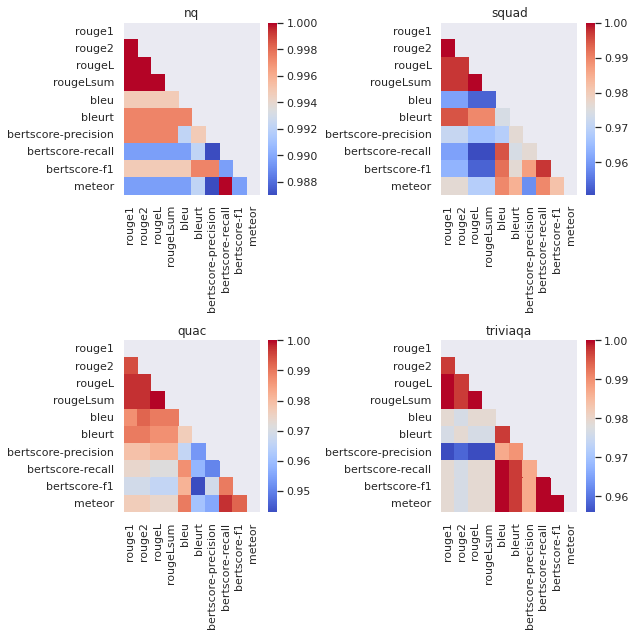

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(9,9))

for ax, dataset in zip (axes.flat, datasets):
  sns.heatmap(similarity[dataset], mask=mask, cmap="coolwarm", ax=ax).set(title=dataset)

fig.tight_layout()

plt.show()

### Black

In [ ]:
!pip install black[jupyter]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 96 kB 2.8 MB/s 
     |████████████████████████████████| 843 kB 42.9 MB/s 
     |████████████████████████████████| 1.6 MB 7.0 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
!black "/content/drive/MyDrive/Colab Notebooks/rr_evaluation_sandbox.ipynb"

reformatted /content/drive/MyDrive/Colab Notebooks/rr_evaluation_sandbox.ipynb

All done! ✨ 🍰 ✨
1 file reformatted.


## Archived Code

In [ ]:
df = (
    evaluation_df[evaluation_df["tested_on"] == "triviaqa"]
    .groupby(["base_model", "trained_on", "tested_on"])
    .mean()
    .sort_values(by=["bertscore-f1"], ascending=False)
)
vector_rouge1 = [sorted(df.rouge1, reverse=True).index(x) + 1 for x in df.rouge1]
vector_rouge1

[1, 2, 3, 4, 7, 8, 5, 6, 9, 10]

In [ ]:
vector_rouge2 = [sorted(df.rouge2, reverse=True).index(x) + 1 for x in df.rouge2]
vector_rouge2

[1, 2, 3, 4, 8, 7, 5, 6, 9, 10]

In [ ]:
vector_rougeL = [sorted(df.rougeL, reverse=True).index(x) + 1 for x in df.rougeL]
vector_rougeL

[1, 2, 3, 4, 7, 8, 5, 6, 9, 10]

In [ ]:
vector_bleurt = [sorted(df.bleurt, reverse=True).index(x) + 1 for x in df.bleurt]
vector_bleurt

[1, 2, 3, 4, 6, 5, 7, 8, 9, 10]

In [ ]:
vector_bertscore_f1 = [
    sorted(df["bertscore-f1"], reverse=True).index(x) + 1 for x in df["bertscore-f1"]
]
vector_bertscore_f1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
result = cosine_similarity(
    [vector_rouge1, vector_rouge2, vector_rougeL, vector_bleurt, vector_bertscore_f1]
)
result

array([[1.        , 0.9974026 , 1.        , 0.97662338, 0.97922078],
       [0.9974026 , 1.        , 0.9974026 , 0.97922078, 0.97662338],
       [1.        , 0.9974026 , 1.        , 0.97662338, 0.97922078],
       [0.97662338, 0.97922078, 0.97662338, 1.        , 0.9974026 ],
       [0.97922078, 0.97662338, 0.97922078, 0.9974026 , 1.        ]])

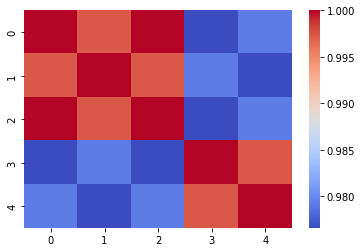

In [ ]:
sns.heatmap(result, cmap="coolwarm")

In [ ]:
df = pd.DataFrame(result)

In [ ]:
df

,0,1,2,3,4
0,1.00000,0.99740,1.00000,0.97662,0.97922
1,0.99740,1.00000,0.99740,0.97922,0.97662
2,1.00000,0.99740,1.00000,0.97662,0.97922
3,0.97662,0.97922,0.97662,1.00000,0.99740
4,0.97922,0.97662,0.97922,0.99740,1.00000


In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

In [ ]:
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

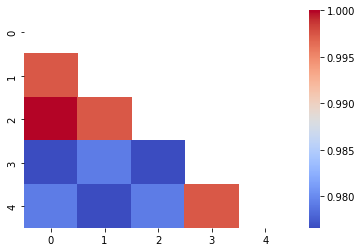

In [ ]:
sns.heatmap(df, mask=mask, cmap="coolwarm")